In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.metrics import confusion_matrix, recall_score, roc_auc_score, accuracy_score, f1_score, precision_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
from IPython.display import display
pd.set_option('display.max_columns', None)
from sklearn.metrics import confusion_matrix,recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor

pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\cpt\data.csv")

In [4]:
df.head()

,ID,date,lat,lng,temperature,precipitation,humidity,global_radiation,hydrometric_level,N,NE,E,SE,S,SW,W,NW,type,utm_x,utm_y,dtm_milan,aspect,dusaf15,geologia,hillshade,ndvi_2019,plan_curvature,profile_curvature,water_distance,slope,spi,tri,twi,geo_0,geo_1,geo_2,geo_3,geo_4,geo_5,geo_6,lc_11,lc_12,lc_14,lc_21,lc_22,lc_23,lc_31,lc_32,lc_33,lc_41,lc_51,pm25
0,ID_046447,2021-01-01,45.496780,9.257515,2.059028,13.2,98.562500,10.680556,78.205623,0.396396,0.375385,0.247368,0.414286,0.008824,0.214286,0.150000,0.596154,NS,520119.968710,5.038171e+06,120.36700,84.649254,12,1,180,0.257589,-0.039992,0.200060,25.495098,0.184223,-2.521106,0.083804,9.651856,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,43.984662
1,ID_046449,2021-01-01,45.171919,9.488997,0.790278,10.4,99.979167,15.111111,58.330245,1.803333,0.000000,0.000000,0.000000,0.000000,2.326087,2.884874,1.834667,NS,538425.012710,5.002165e+06,140.39348,156.586060,22,4,168,0.625454,0.304617,-0.824899,1177.677700,4.073685,-9.549936,0.945372,5.860868,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,44.498188
2,ID_046451,2021-01-01,45.542665,9.205603,1.781250,10.4,97.805556,11.569444,26.353662,0.999153,0.951351,0.985714,1.150000,0.316667,0.228571,0.984507,1.204469,NS,516050.967733,5.043257e+06,145.39200,243.985900,12,1,182,0.638978,-0.220508,0.743542,168.077360,1.195234,2.439991,0.357239,10.224111,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,44.481305
3,ID_046453,2021-01-01,45.548517,8.847322,1.659028,11.4,99.986111,14.340278,55.861497,1.518997,1.455814,1.425000,1.200000,0.000000,0.000000,0.000000,1.220513,SB,488082.005450,5.043898e+06,183.26503,311.262500,11,1,182,0.444127,-0.087728,0.620219,89.442720,0.578484,-11.503481,0.245245,7.814413,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,44.504281
4,ID_046455,2021-01-01,45.471656,9.189110,2.863889,13.4,91.913194,10.485417,61.041066,1.381849,1.465286,2.066413,0.379689,0.186467,0.826404,1.237188,1.422297,NS,514781.970084,5.035365e+06,120.77182,21.154236,12,1,181,0.080548,-0.060938,0.011816,258.118200,0.268058,-0.536639,0.100928,10.375408,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,45.083535


In [5]:
df.shape

(14484, 52)

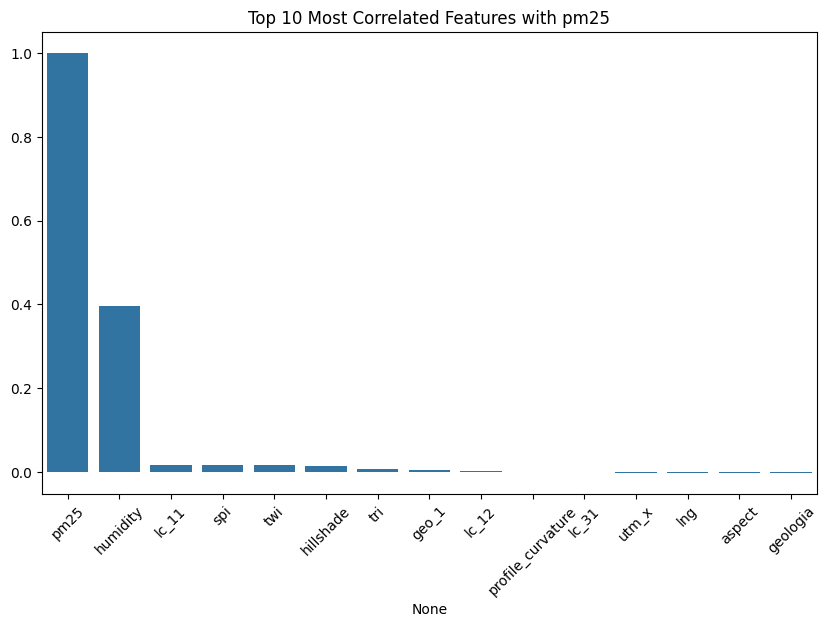

pm25                 1.000000
humidity             0.397183
lc_11                0.017213
spi                  0.015796
twi                  0.015539
hillshade            0.014721
tri                  0.006170
geo_1                0.005042
lc_12                0.001270
profile_curvature    0.001136
Name: pm25, dtype: float64


In [6]:
numeric_df = df.select_dtypes(include=['number'])
correlation = numeric_df.corr()["pm25"].sort_values(ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(x=correlation.index[:15], y=correlation.values[:15])
plt.xticks(rotation=45)
plt.title("Top 10 Most Correlated Features with pm25")
plt.show()

print(correlation.head(10))
top_features = correlation.index[1:11].tolist()


First 5 rows of the dataset:
          ID        date        lat       lng  temperature  precipitation  \
0  ID_046447  2021-01-01  45.496780  9.257515     2.059028           13.2   
1  ID_046449  2021-01-01  45.171919  9.488997     0.790278           10.4   
2  ID_046451  2021-01-01  45.542665  9.205603     1.781250           10.4   
3  ID_046453  2021-01-01  45.548517  8.847322     1.659028           11.4   
4  ID_046455  2021-01-01  45.471656  9.189110     2.863889           13.4   

    humidity  global_radiation  hydrometric_level         N        NE  \
0  98.562500         10.680556          78.205623  0.396396  0.375385   
1  99.979167         15.111111          58.330245  1.803333  0.000000   
2  97.805556         11.569444          26.353662  0.999153  0.951351   
3  99.986111         14.340278          55.861497  1.518997  1.455814   
4  91.913194         10.485417          61.041066  1.381849  1.465286   

          E        SE         S        SW         W        NW type  \

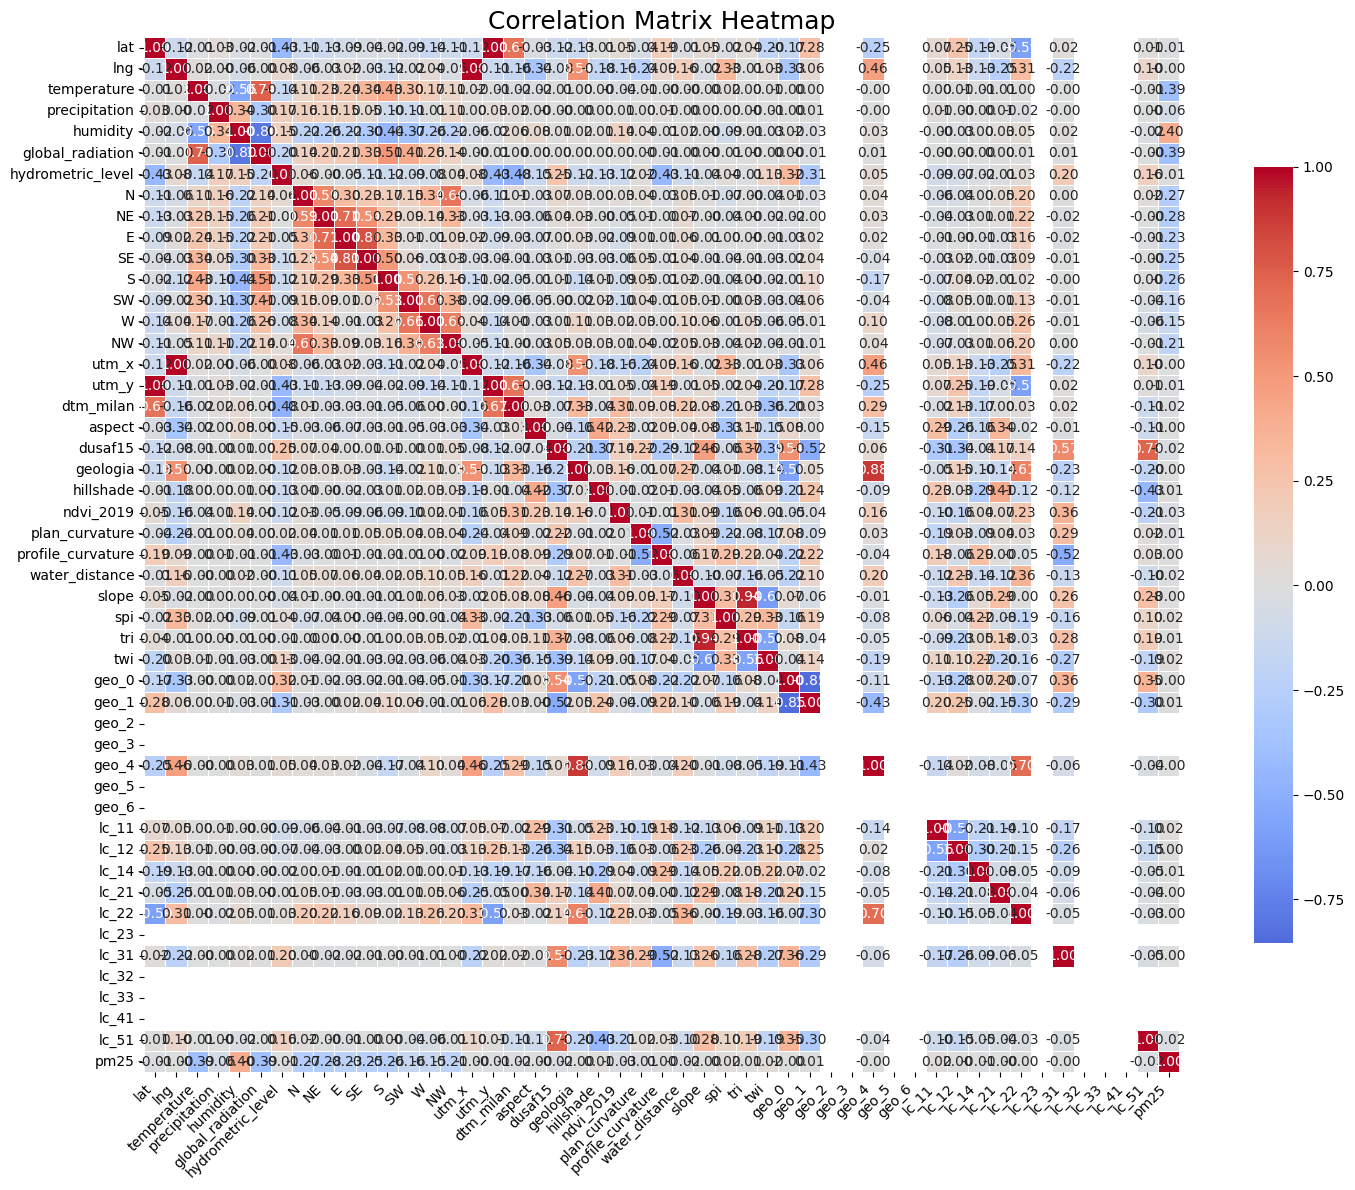


Highly correlated feature pairs (|correlation| >= 0.5):
     Feature1          Feature2  Correlation
0         lat               lat     1.000000
426        SW                SW     1.000000
483        NW                NW     1.000000
510     utm_x             utm_x     1.000000
536     utm_y             utm_y     1.000000
..        ...               ...          ...
557     utm_y             lc_22    -0.590581
37        lat             lc_22    -0.591898
744     slope               twi    -0.608736
159  humidity  global_radiation    -0.800250
796     geo_0             geo_1    -0.853575

[77 rows x 3 columns]


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("First 5 rows of the dataset:")
print(df.head())

df_numeric = df.select_dtypes(include=[np.number])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True,
            linewidths=0.5, cbar_kws={"shrink": .75})
plt.title("Correlation Matrix Heatmap", fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

threshold = 0.5  

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
filtered_corr = corr_matrix.where(mask)

strong_corr_pairs = (
    filtered_corr.stack()
    .reset_index()
    .rename(columns={"level_0": "Feature1", "level_1": "Feature2", 0: "Correlation"})
)

strong_corr_pairs = strong_corr_pairs[
    strong_corr_pairs['Correlation'].abs() >= threshold
]

strong_corr_pairs = strong_corr_pairs.sort_values(by='Correlation', ascending=False)

print("\nHighly correlated feature pairs (|correlation| >= {}):".format(threshold))
print(strong_corr_pairs)



Missing values in the DataFrame:
ID                   0
date                 0
lat                  0
lng                  0
temperature          0
precipitation        0
humidity             0
global_radiation     0
hydrometric_level    0
N                    0
NE                   0
E                    0
SE                   0
S                    0
SW                   0
W                    0
NW                   0
type                 0
utm_x                0
utm_y                0
dtm_milan            0
aspect               0
dusaf15              0
geologia             0
hillshade            0
ndvi_2019            0
plan_curvature       0
profile_curvature    0
water_distance       0
slope                0
spi                  0
tri                  0
twi                  0
geo_0                0
geo_1                0
geo_2                0
geo_3                0
geo_4                0
geo_5                0
geo_6                0
lc_11                0
lc_12                0


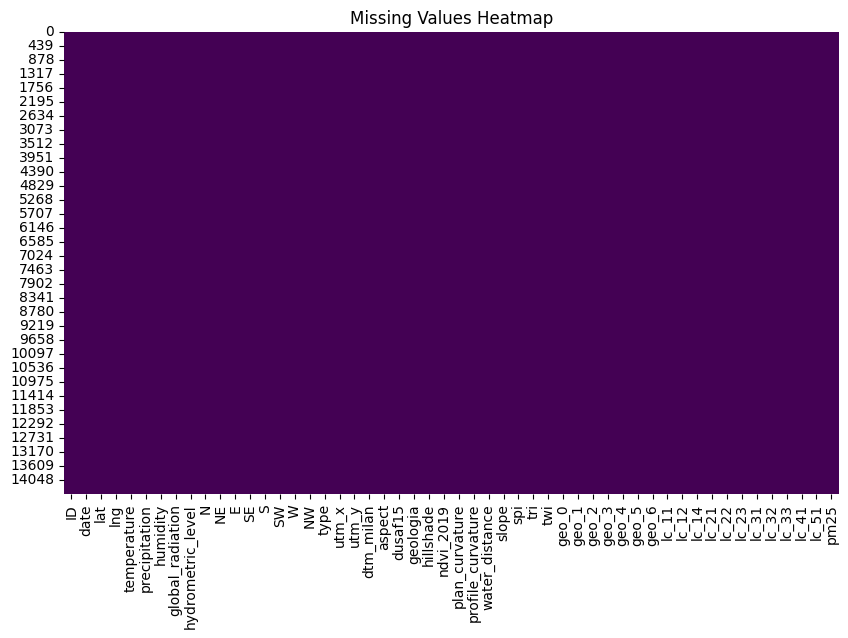

In [8]:
print("\nMissing values in the DataFrame:")
print(df.isnull().sum())


plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [9]:
df.head()

,ID,date,lat,lng,temperature,precipitation,humidity,global_radiation,hydrometric_level,N,NE,E,SE,S,SW,W,NW,type,utm_x,utm_y,dtm_milan,aspect,dusaf15,geologia,hillshade,ndvi_2019,plan_curvature,profile_curvature,water_distance,slope,spi,tri,twi,geo_0,geo_1,geo_2,geo_3,geo_4,geo_5,geo_6,lc_11,lc_12,lc_14,lc_21,lc_22,lc_23,lc_31,lc_32,lc_33,lc_41,lc_51,pm25
0,ID_046447,2021-01-01,45.496780,9.257515,2.059028,13.2,98.562500,10.680556,78.205623,0.396396,0.375385,0.247368,0.414286,0.008824,0.214286,0.150000,0.596154,NS,520119.968710,5.038171e+06,120.36700,84.649254,12,1,180,0.257589,-0.039992,0.200060,25.495098,0.184223,-2.521106,0.083804,9.651856,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,43.984662
1,ID_046449,2021-01-01,45.171919,9.488997,0.790278,10.4,99.979167,15.111111,58.330245,1.803333,0.000000,0.000000,0.000000,0.000000,2.326087,2.884874,1.834667,NS,538425.012710,5.002165e+06,140.39348,156.586060,22,4,168,0.625454,0.304617,-0.824899,1177.677700,4.073685,-9.549936,0.945372,5.860868,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,44.498188
2,ID_046451,2021-01-01,45.542665,9.205603,1.781250,10.4,97.805556,11.569444,26.353662,0.999153,0.951351,0.985714,1.150000,0.316667,0.228571,0.984507,1.204469,NS,516050.967733,5.043257e+06,145.39200,243.985900,12,1,182,0.638978,-0.220508,0.743542,168.077360,1.195234,2.439991,0.357239,10.224111,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,44.481305
3,ID_046453,2021-01-01,45.548517,8.847322,1.659028,11.4,99.986111,14.340278,55.861497,1.518997,1.455814,1.425000,1.200000,0.000000,0.000000,0.000000,1.220513,SB,488082.005450,5.043898e+06,183.26503,311.262500,11,1,182,0.444127,-0.087728,0.620219,89.442720,0.578484,-11.503481,0.245245,7.814413,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,44.504281
4,ID_046455,2021-01-01,45.471656,9.189110,2.863889,13.4,91.913194,10.485417,61.041066,1.381849,1.465286,2.066413,0.379689,0.186467,0.826404,1.237188,1.422297,NS,514781.970084,5.035365e+06,120.77182,21.154236,12,1,181,0.080548,-0.060938,0.011816,258.118200,0.268058,-0.536639,0.100928,10.375408,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,45.083535


In [10]:
def handle_outliers(df, numerical_columns=None, method='IQR', verbose=True):
    
  
    if numerical_columns is None:
        numerical_columns = df.select_dtypes(include=['number']).columns
    
    
    for col in numerical_columns:
        if col in df.columns:
            if method == 'IQR':
              
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                
                
                outliers = ((df[col] < lower_bound) | (df[col] > upper_bound))
                num_outliers = outliers.sum()
                
               
                df.loc[df[col] < lower_bound, col] = lower_bound
                df.loc[df[col] > upper_bound, col] = upper_bound
                
                if verbose:
                    print(f"[INFO] Outliers handled in '{col}' using IQR:")
                    print(f"         - Number of Outliers: {num_outliers}")
                    print(f"         - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
            
            elif method == 'Z-Score':
                
                mean = df[col].mean()
                std_dev = df[col].std()
                threshold = 3  
                
                
                outliers = ((df[col] < (mean - threshold * std_dev)) | (df[col] > (mean + threshold * std_dev)))
                num_outliers = outliers.sum()
                
                
                lower_bound = mean - threshold * std_dev
                upper_bound = mean + threshold * std_dev
                df.loc[df[col] < lower_bound, col] = lower_bound
                df.loc[df[col] > upper_bound, col] = upper_bound
                
                if verbose:
                    print(f"[INFO] Outliers handled in '{col}' using Z-Score:")
                    print(f"         - Number of Outliers: {num_outliers}")
                    print(f"         - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    
    return df

In [11]:
handle_outliers(df)

[INFO] Outliers handled in 'lat' using IQR:
         - Number of Outliers: 1091
         - Lower Bound: 45.35500199999999, Upper Bound: 45.64392200000001
[INFO] Outliers handled in 'lng' using IQR:
         - Number of Outliers: 1444
         - Lower Bound: 8.778828999999998, Upper Bound: 9.497125
[INFO] Outliers handled in 'temperature' using IQR:
         - Number of Outliers: 0
         - Lower Bound: -13.996824562080578, Upper Bound: 43.872980005435906
[INFO] Outliers handled in 'precipitation' using IQR:
         - Number of Outliers: 3151
         - Lower Bound: -0.47216423279425795, Upper Bound: 0.78694038799043
[INFO] Outliers handled in 'humidity' using IQR:
         - Number of Outliers: 0
         - Lower Bound: 15.979750078330163, Upper Bound: 126.60103884189087
[INFO] Outliers handled in 'global_radiation' using IQR:
         - Number of Outliers: 0
         - Lower Bound: -179.56547816668356, Upper Bound: 488.75010640437176
[INFO] Outliers handled in 'hydrometric_level' u

C:\Users\Admin\AppData\Local\Temp\ipykernel_17780\1736846019.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lower_bound, col] = lower_bound
C:\Users\Admin\AppData\Local\Temp\ipykernel_17780\1736846019.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '175.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lower_bound, col] = lower_bound
C:\Users\Admin\AppData\Local\Temp\ipykernel_17780\1736846019.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lower_bou

,ID,date,lat,lng,temperature,precipitation,humidity,global_radiation,hydrometric_level,N,NE,E,SE,S,SW,W,NW,type,utm_x,utm_y,dtm_milan,aspect,dusaf15,geologia,hillshade,ndvi_2019,plan_curvature,profile_curvature,water_distance,slope,spi,tri,twi,geo_0,geo_1,geo_2,geo_3,geo_4,geo_5,geo_6,lc_11,lc_12,lc_14,lc_21,lc_22,lc_23,lc_31,lc_32,lc_33,lc_41,lc_51,pm25
0,ID_046447,2021-01-01,45.496780,9.257515,2.059028,0.786940,98.562500,10.680556,78.205623,0.396396,0.375385,0.247368,0.414286,0.008824,0.214286,0.150000,0.596154,NS,520119.968710,5.038171e+06,120.36700,84.649254,12.0,1,180.0,0.257589,-0.039992,0.200060,25.495098,0.184223,-2.521106,0.083804,9.651856,0,1,0,0,0,0,0,0.0,1.0,0,0,0,0,0,0,0,0,0,43.984662
1,ID_046449,2021-01-01,45.355002,9.488997,0.790278,0.786940,99.979167,15.111111,58.330245,1.803333,0.000000,0.000000,0.000000,0.000000,2.326087,2.884874,1.834667,NS,538425.012710,5.022434e+06,140.39348,156.586060,18.5,1,175.5,0.625454,0.304617,-0.824899,537.242633,4.073685,-9.549936,0.945372,5.860868,0,1,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,44.498188
2,ID_046451,2021-01-01,45.542665,9.205603,1.781250,0.786940,97.805556,11.569444,26.353662,0.999153,0.951351,0.985714,1.150000,0.316667,0.228571,0.984507,1.204469,NS,516050.967733,5.043257e+06,145.39200,243.985900,12.0,1,182.0,0.638978,-0.220508,0.743542,168.077360,1.195234,2.439991,0.357239,10.224111,0,1,0,0,0,0,0,0.0,1.0,0,0,0,0,0,0,0,0,0,44.481305
3,ID_046453,2021-01-01,45.548517,8.847322,1.659028,0.786940,99.986111,14.340278,55.861497,1.518997,1.455814,1.425000,1.200000,0.000000,0.000000,0.000000,1.220513,SB,488082.005450,5.043898e+06,183.26503,311.262500,11.0,1,182.0,0.444127,-0.087728,0.620219,89.442720,0.578484,-11.503481,0.245245,7.814413,0,1,0,0,0,0,0,1.0,0.0,0,0,0,0,0,0,0,0,0,44.504281
4,ID_046455,2021-01-01,45.471656,9.189110,2.863889,0.786940,91.913194,10.485417,61.041066,1.381849,1.465286,2.066413,0.379689,0.186467,0.826404,1.237188,1.422297,NS,514781.970084,5.035365e+06,120.77182,21.154236,12.0,1,181.0,0.080548,-0.060938,0.011816,258.118200,0.268058,-0.536639,0.100928,10.375408,0,1,0,0,0,0,0,0.0,1.0,0,0,0,0,0,0,0,0,0,45.083535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14479,ID_121648,2021-12-30,45.396195,9.282700,4.068290,0.018870,98.841926,31.136746,49.847023,1.102796,1.076272,1.607448,1.464914,0.976055,1.115676,1.328953,1.211017,UT,522126.993940,5.027003e+06,98.33748,81.273820,11.0,1,180.0,0.400000,-0.110519,0.020218,25.000000,0.247792,-1.531532,0.060948,9.760875,0,1,0,0,0,0,0,1.0,0.0,0,0,0,0,0,0,0,0,0,35.277410
14480,ID_121649,2021-12-31,45.523426,9.044600,2.058015,0.098848,99.243918,52.115708,23.179946,0.806201,0.485191,0.611951,0.618859,1.197694,1.369756,1.317538,1.031706,UB,503483.010045,5.041100e+06,151.78000,169.570970,12.0,1,178.0,0.098690,0.238851,-0.277140,71.589110,1.028138,-10.928314,0.240213,7.239246,0,1,0,0,0,0,0,0.0,1.0,0,0,0,0,0,0,0,0,0,36.501711
14481,ID_121650,2021-12-31,45.552326,9.227764,3.027432,0.005722,97.639251,54.555107,19.551793,0.751813,0.703680,0.577904,1.053680,1.184131,1.419823,1.332128,0.947827,UT,517777.981725,5.044335e+06,149.67400,282.297900,12.0,1,187.5,0.443687,-0.585386,-0.341368,537.242633,3.251062,0.350555,0.812581,6.780195,0,1,0,0,0,0,0,0.0,1.0,0,0,0,0,0,0,0,0,0,43.123672
14482,ID_121651,2021-12-31,45.443858,9.167945,3.726027,0.008928,97.957254,59.206698,49.125161,1.047037,0.588793,0.783190,0.528735,1.288881,1.379505,1.258999,1.000181,UT,513134.038886,5.032273e+06,113.49300,19.005035,12.0,1,184.0,0.186638,0.010948,2.139030,15.000000,2.277274,5.445005,0.739729,11.898918,0,1,0,0,0,0,0,0.0,1.0,0,0,0,0,0,0,0,0,0,31.561594


In [12]:
df['date'] = pd.to_datetime(df['date'])


df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday 
df['dayofyear'] = df['date'].dt.dayofyear
df['week'] = df['date'].dt.isocalendar().week


In [13]:


df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['dayofyear_sin'] = np.sin(2 * np.pi * df['dayofyear'] / 365.25)
df['dayofyear_cos'] = np.cos(2 * np.pi * df['dayofyear'] / 365.25)
df['weekday_sin'] = np.sin(2 * np.pi * df['weekday'] / 7)
df['weekday_cos'] = np.cos(2 * np.pi * df['weekday'] / 7)

In [14]:
wind_cols = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
df['total_wind_speed'] = df[wind_cols].sum(axis=1)

df['dominant_wind_direction'] = df[wind_cols].idxmax(axis=1).fillna('None')

df['wind_humidity_interaction'] = df['total_wind_speed'] * df['humidity']


In [15]:
df['date'] = pd.to_datetime(df['date'])


cutoff_date = pd.to_datetime('2021-10-01')

train_df = df[df['date'] <= cutoff_date]
test_df = df[df['date'] > cutoff_date]

features = df.drop(['pm25', 'ID', 'date','geo_6', 'geo_3', 'geo_2','lc_23','lc_32','lc_33','lc_41', 'year','geo_5','water_distance', 'utm_x', 'utm_y','aspect','spi', 'global_radiation','wind_humidity_interaction', 'hillshade','dtm_milan',  'N','month','weekday',  'weekday_sin','SW','E','dusaf15','dayofyear','week','geo_0', 'geo_1', 'geo_4', 'lc_21',  'lc_31', ], axis=1).columns


X_train = pd.get_dummies(train_df[features], drop_first=True, dtype=int)
X_test = pd.get_dummies(test_df[features], drop_first=True, dtype=int)

y_train = train_df['pm25'].astype(float)
y_test = test_df['pm25'].astype(float)

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

print("X_train columns:", X_train.columns)
print("X_test columns:", X_test.columns)

X_train columns: Index(['lat', 'lng', 'temperature', 'precipitation', 'humidity',
       'hydrometric_level', 'NE', 'SE', 'S', 'W', 'NW', 'geologia',
       'ndvi_2019', 'plan_curvature', 'profile_curvature', 'slope', 'tri',
       'twi', 'lc_11', 'lc_12', 'lc_14', 'lc_22', 'lc_51', 'day', 'month_sin',
       'month_cos', 'dayofyear_sin', 'dayofyear_cos', 'weekday_cos',
       'total_wind_speed', 'type_SB', 'type_SI', 'type_UB', 'type_UT',
       'dominant_wind_direction_N', 'dominant_wind_direction_NE',
       'dominant_wind_direction_NW', 'dominant_wind_direction_S',
       'dominant_wind_direction_SE', 'dominant_wind_direction_SW',
       'dominant_wind_direction_W'],
      dtype='object')
X_test columns: Index(['lat', 'lng', 'temperature', 'precipitation', 'humidity',
       'hydrometric_level', 'NE', 'SE', 'S', 'W', 'NW', 'geologia',
       'ndvi_2019', 'plan_curvature', 'profile_curvature', 'slope', 'tri',
       'twi', 'lc_11', 'lc_12', 'lc_14', 'lc_22', 'lc_51', 'day', 'month_s

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


In [17]:
X_train=X_train_scaled
X_test=X_test_scaled

In [20]:


param_grid = {
    'n_estimators': [10],
    'max_depth': [3],
    'learning_rate': [0.01],
    'subsample': [0.2],
    'colsample_bytree': [0.1]
}

grid_search = GridSearchCV(estimator=XGBRegressor(random_state=0),
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error',  
                           cv=5, 
                           verbose=1, 
                           n_jobs=-1)

grid_search.fit(X_train, y_train)


print("Best parameters found: ", grid_search.best_params_)


best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on testing set: {rmse:.2f}")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found:  {'colsample_bytree': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.2}
RMSE on testing set: 17.42


       name_of_the_coefficient  coefficient_of_ridge_regression  \
25                   month_cos                         9.303862   
26               dayofyear_sin                         6.864168   
4                     humidity                         3.515227   
24                   month_sin                        -3.213629   
27               dayofyear_cos                        -2.260152   
23                         day                         1.756052   
2                  temperature                         1.664017   
16                         tri                         1.370872   
12                   ndvi_2019                        -1.240199   
6                           NE                        -0.916412   
5            hydrometric_level                        -0.912509   
28                 weekday_cos                        -0.770611   
3                precipitation                        -0.765218   
15                       slope                        -0.70857

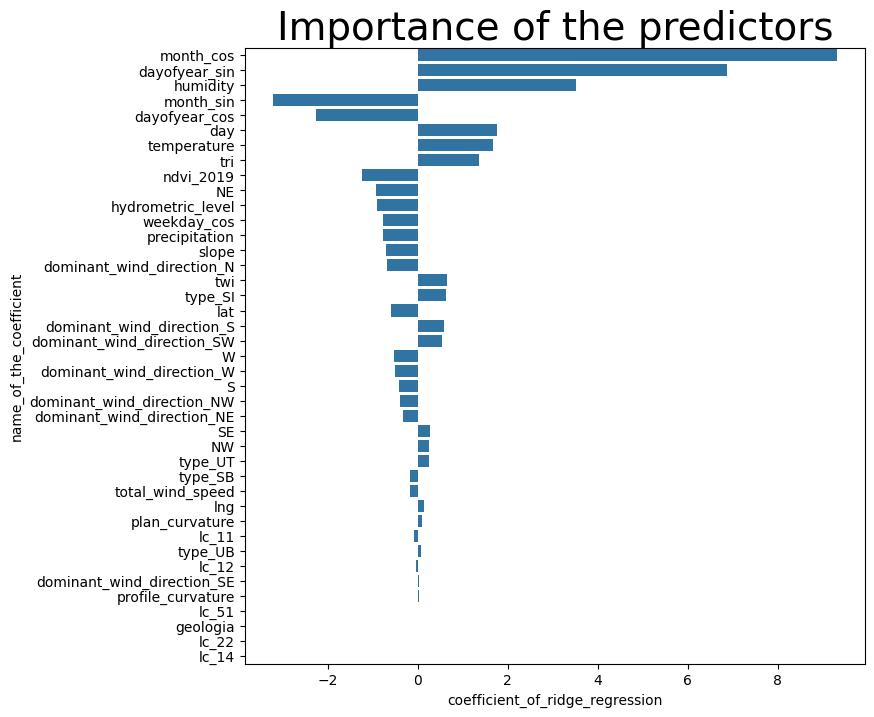

In [22]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)  
ridge.fit(X_train, y_train)

covariates = X_train.columns

variable_importance = pd.DataFrame({
    'name_of_the_coefficient': covariates,
    'coefficient_of_ridge_regression': ridge.coef_,
    'absolute_coefficient': abs(ridge.coef_)
})

variable_importance.sort_values('absolute_coefficient', ascending=False, inplace=True)
plt.figure(figsize=(8, 8))
plt.title('Importance of the predictors', fontsize=28)
barplot_importance = sns.barplot(
    x=variable_importance['coefficient_of_ridge_regression'],
    y=variable_importance['name_of_the_coefficient'],
    orient="h"
)
print (variable_importance)

In [24]:
import numpy as np
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)  
ridge.fit(X_train, y_train)


y_pred = ridge.predict(X_test)
print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on testing set: {rmse:.2f}")





Coefficients: [-0.59631792  0.15014271  1.66401719 -0.76521825  3.51522667 -0.91250923
 -0.91641151  0.27885508 -0.40820372 -0.52352006  0.26221365  0.
 -1.24019919  0.09189767  0.02315269 -0.70857459  1.37087227  0.65311781
 -0.0880708  -0.04696228  0.          0.          0.          1.7560525
 -3.21362936  9.30386205  6.86416838 -2.26015234 -0.77061119 -0.17229359
 -0.17262037  0.63271973  0.07921279  0.25921788 -0.67680933 -0.33653413
 -0.40210521  0.581187    0.02569885  0.55089937 -0.51185052]
Intercept: 17.91804444598623
RMSE on testing set: 11.79


In [25]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 10000, 1000]}

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_ridge = grid_search.best_estimator_
print("Best alpha:", grid_search.best_params_['alpha'])

y_pred = best_ridge.predict(X_test)

print("Coefficients:", best_ridge.coef_)
print("Intercept:", best_ridge.intercept_)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on testing set: {rmse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2:.4f}")


Best alpha: 1000
Coefficients: [-5.06598067e-01 -1.17157046e-02  4.97948517e-01 -4.74475120e-01
  2.59797049e+00 -6.42527151e-01 -8.64757875e-01  1.77106169e-01
 -3.63630238e-01 -4.16192087e-01  1.31695977e-01  0.00000000e+00
 -9.96856304e-01  4.94122205e-02  7.36456432e-02 -1.11473658e-01
  5.36229162e-01  4.23712136e-01 -5.98666889e-02 -2.97343883e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.67550968e+00
  9.36889500e-01  3.54974456e+00  1.24592720e+00  2.13502904e+00
 -7.66452865e-01 -3.79286493e-01 -2.38966116e-01  3.84869070e-01
 -2.48919573e-03  2.44911358e-01 -6.97105825e-01 -4.43843512e-01
 -3.87535386e-01  4.73285871e-01 -5.24328931e-03  4.43987179e-01
 -5.58063533e-01]
Intercept: 17.91804444598623
RMSE on testing set: 11.79
R-squared (R2): 0.2689


In [26]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_lasso = grid_search.best_estimator_
print("Best alpha:", grid_search.best_params_['alpha'])

y_pred = best_lasso.predict(X_test)

print("Coefficients:", best_lasso.coef_)
print("Intercept:", best_lasso.intercept_)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on testing set: {rmse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2:.4f}")

Best alpha: 0.1
Coefficients: [-0.42218705  0.          0.83960119 -0.53736885  2.9278435  -0.55954039
 -0.93014478  0.         -0.17089799 -0.4348291  -0.          0.
 -0.96126538 -0.          0.          0.          0.33315788  0.32316113
 -0.         -0.          0.          0.          0.          1.67354723
  0.          6.1216952   2.82616295  0.         -0.71601732 -0.
 -0.14058803  0.29748521 -0.          0.20071561 -0.66483143 -0.35069651
 -0.32764509  0.34942527  0.          0.35430315 -0.51952851]
Intercept: 17.918044445986226
RMSE on testing set: 11.76
R-squared (R2): 0.2723


In [27]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

lasso =Lasso()
lasso.fit(X_train, y_train)


y_predl = lasso.predict(X_test)
print("Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)


rmse = np.sqrt(mean_squared_error(y_test, y_predl))
print(f"RMSE on testing set: {rmse:.2f}")
r2 = r2_score(y_test, y_predl)
print(f"R-squared (R2): {r2:.4f}")


Coefficients: [-0.          0.         -0.         -0.          1.22520547 -0.
 -0.46114037 -0.         -0.         -0.         -0.08676727  0.
 -0.         -0.          0.         -0.          0.          0.
  0.          0.          0.          0.          0.          0.73401618
  1.22745325  3.0674937   0.          2.05690875 -0.         -0.19852425
 -0.         -0.         -0.          0.         -0.         -0.
 -0.          0.          0.          0.         -0.        ]
Intercept: 17.918044445986208
RMSE on testing set: 12.67
R-squared (R2): 0.1558


In [28]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(n_estimators=80, learning_rate=0.06, depth=3, random_state=0, verbose=0)
cat_model.fit(X_train, y_train)

y_pred_cat = cat_model.predict(X_test)


rmse_cat = np.sqrt(mean_squared_error(y_test, y_pred_cat))
print(f"RMSE on testing set (CatBoost): {rmse_cat:.10f}")

RMSE on testing set (CatBoost): 11.9285744114


In [29]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, subsample=0.7, colsample_bytree=0.7, random_state=0)
lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)


rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
print(f"RMSE on testing set (LightGBM): {rmse_lgb:.10f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3457
[LightGBM] [Info] Number of data points in the train set: 10863, number of used features: 37
[LightGBM] [Info] Start training from score 17.918044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [30]:
from sklearn import svm
model=svm.SVR(gamma='scale',kernel='rbf')
model.fit(X_train,y_train)
predictions=model.predict(X_test)



rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE on testing set: {rmse:.2f}")
r2 = r2_score(y_test, predictions)
print(f"R-squared (R2): {r2:.4f}")


RMSE on testing set: 12.03
R-squared (R2): 0.2384


lasso have  the best rmse 11.76